In [2]:
# notebooks/example_notebook.ipynb
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from ab_testing import save_insurance_data_to_csv

In [4]:
# Example usage
text_file_path = '../data/insurance_data.txt'  # Replace with your actual file path
save_insurance_data_to_csv(text_file_path)

c:\Users\lenovo\Documents\10acadmy\Car-Insurance\scripts\ab_testing.py:65: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(text_file_path, delimiter='|')


Data saved to c:\Users\lenovo\Documents\10acadmy\Car-Insurance\data\insurance_text_data.csv


In [5]:
import pandas as pd
from scipy import stats


In [6]:
# Load the data
csv_file_path = '../data/insurance_text_data.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5876\3222939712.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [56]:
# Descriptive statistics for numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
descriptive_stats = df[numerical_columns].describe()
print(descriptive_stats)


       TotalPremium   TotalClaims    SumInsured  CalculatedPremiumPerTerm
count  1.000098e+06  1.000098e+06  1.000098e+06              1.000098e+06
mean   6.190550e+01  6.486119e+01  6.041727e+05              1.178757e+02
std    2.302845e+02  2.384075e+03  1.508332e+06              3.997017e+02
min   -7.825768e+02 -1.200241e+04  1.000000e-02              0.000000e+00
25%    0.000000e+00  0.000000e+00  5.000000e+03              3.224800e+00
50%    2.178333e+00  0.000000e+00  7.500000e+03              8.436900e+00
75%    2.192982e+01  0.000000e+00  2.500000e+05              9.000000e+01
max    6.528260e+04  3.930921e+05  1.263620e+07              7.442217e+04


In [9]:
# Check data types for all columns
dtypes = df.dtypes
print(dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

### Check for Missing Values:

In [60]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100


UnderwrittenCoverID     0.000000
PolicyID                0.000000
TransactionMonth        0.000000
IsVATRegistered         0.000000
Citizenship             0.000000
LegalType               0.000000
Title                   0.000000
Language                0.000000
Bank                   14.594670
AccountType             4.022806
dtype: float64


In [57]:
# Check for missing values
missing_values = df.isnull().sum()



In [49]:
# Define your groups (A and B)
group_a = df[df['Gender'] == 'Male']['TotalClaims']
group_b = df[df['Gender'] == 'Female']['TotalClaims']

In [50]:
# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b, nan_policy='omit')

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.24803623812388725
P-value: 0.8041073961270343


### Univariate Analysis (Histograms for Numerical Columns)

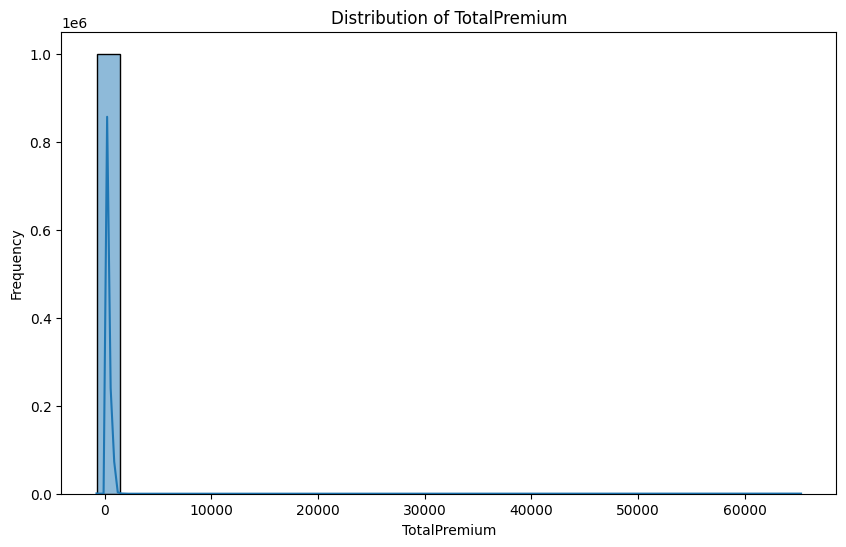

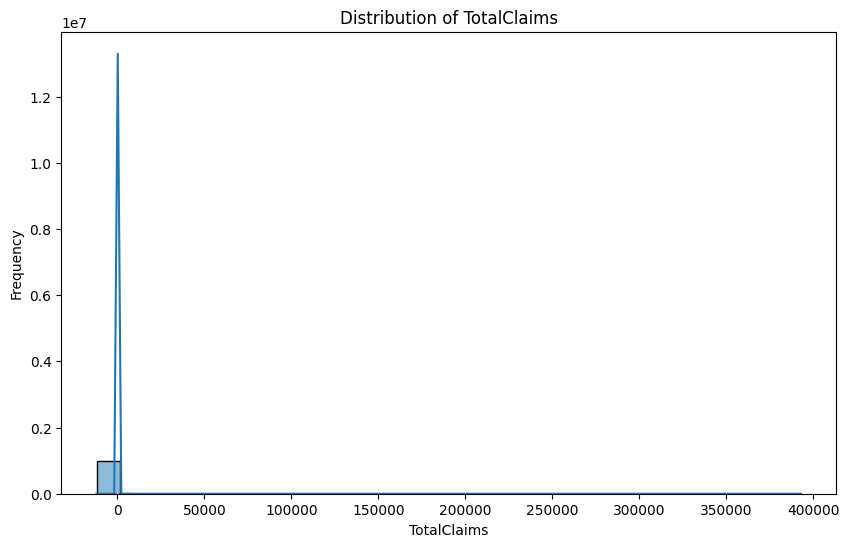

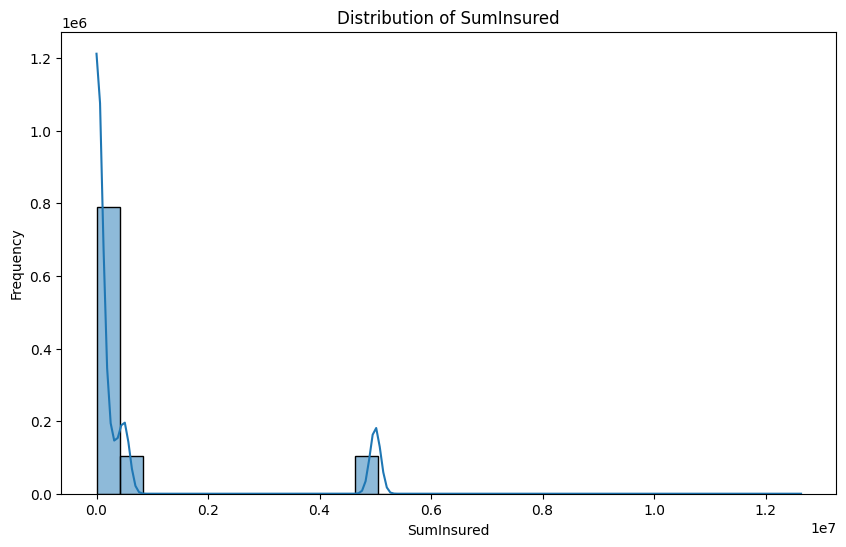

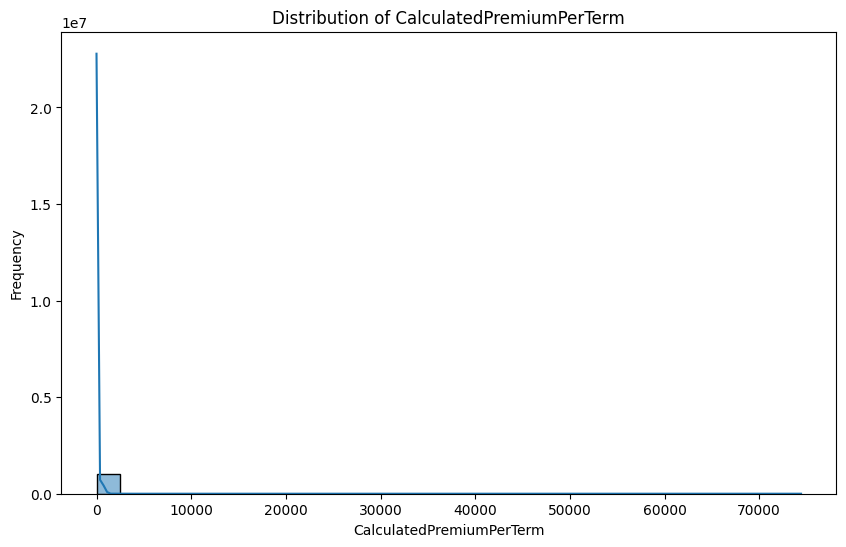

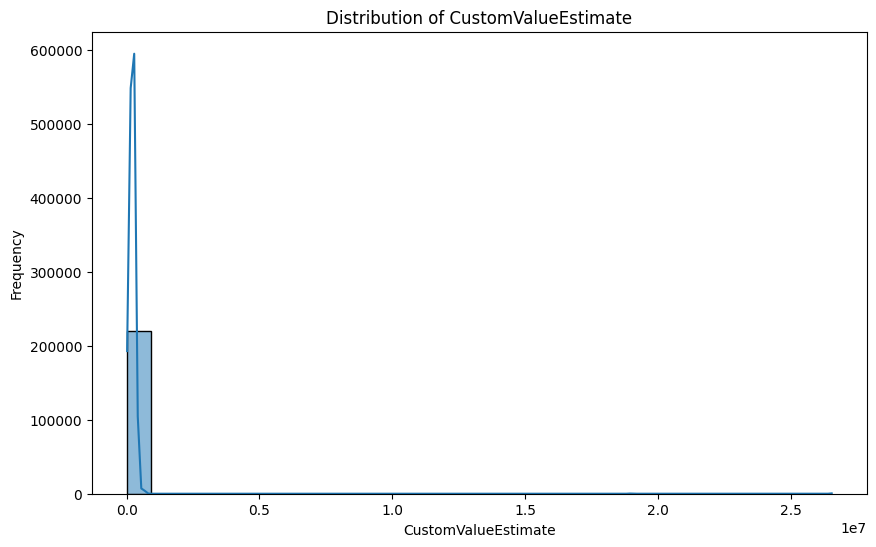

In [65]:
# Plot histograms for numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(),kde=True , bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

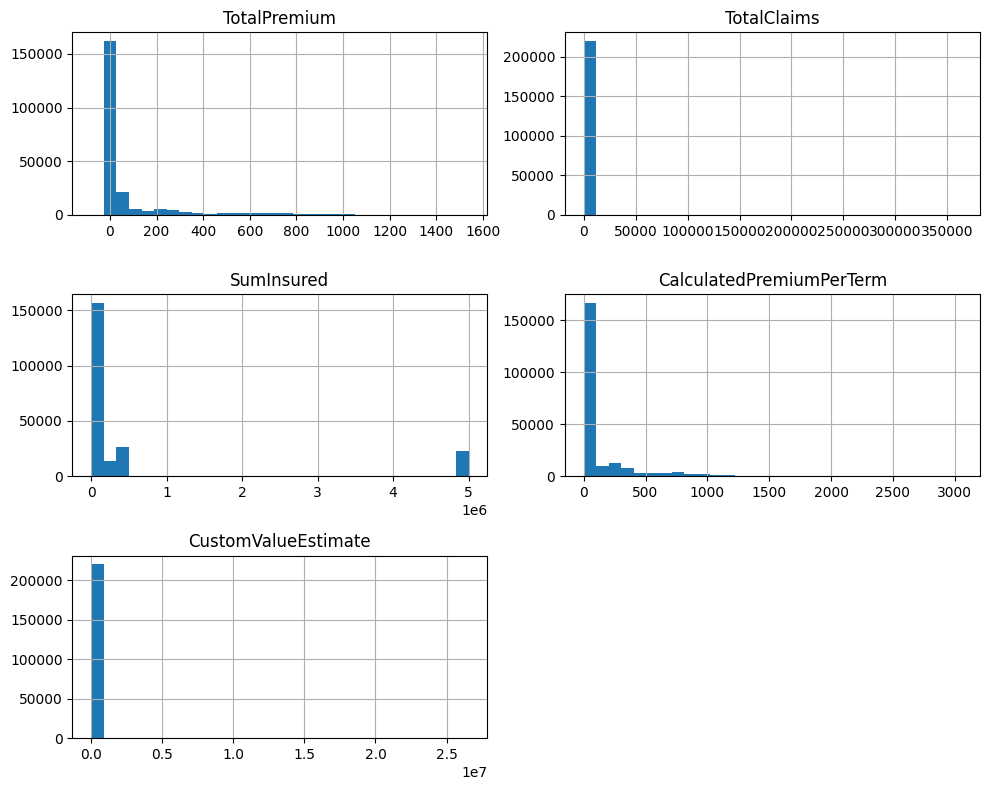

In [69]:
# Plot histograms for numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'CustomValueEstimate']
df[numerical_columns].dropna().hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()
# df['CoverCategory'].value_counts().plot(kind='bar',figsize=(10, 6))
# plt.title("Distribution of CoverCategory")
# plt.ylabel("Count")
# plt.show()


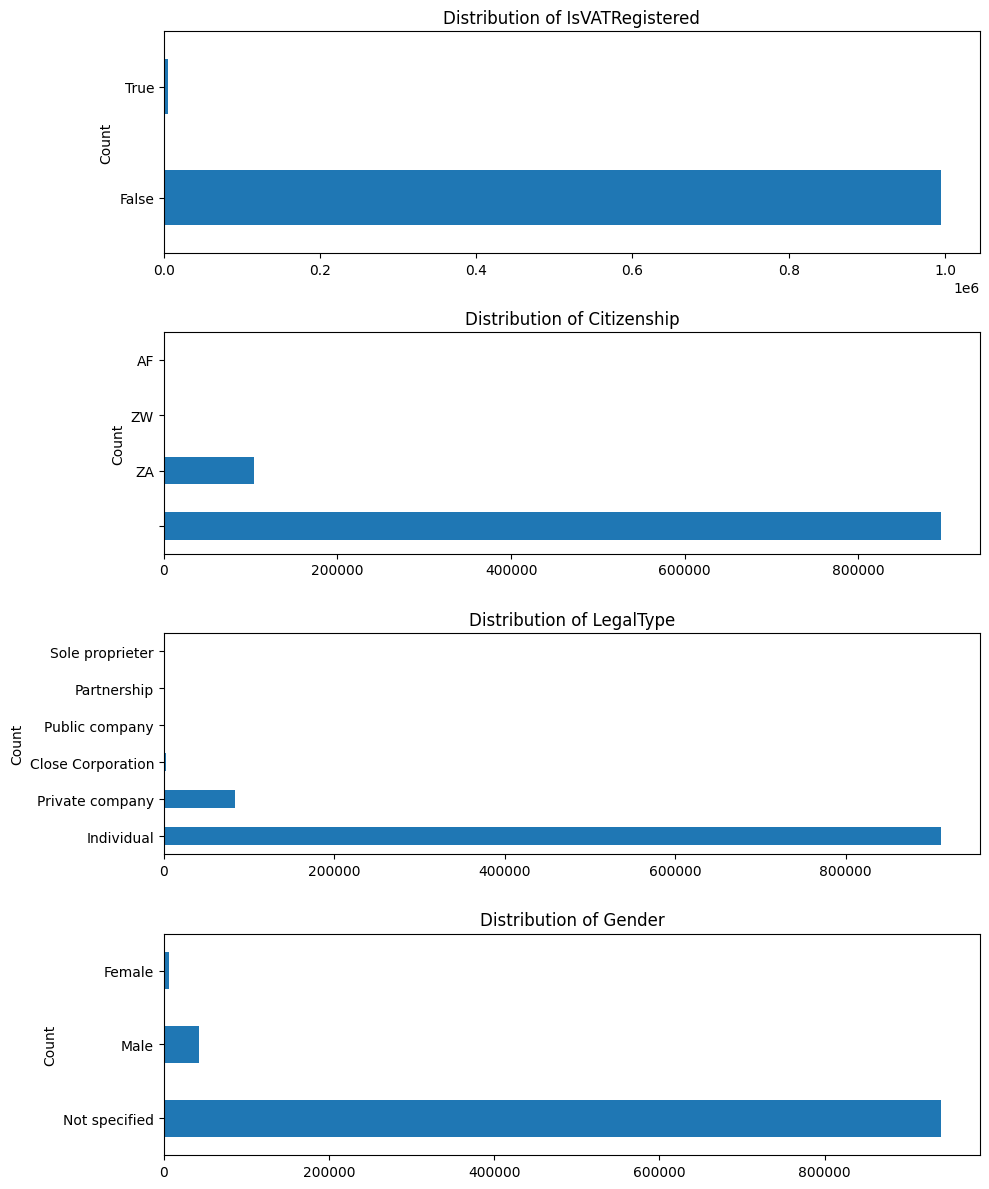

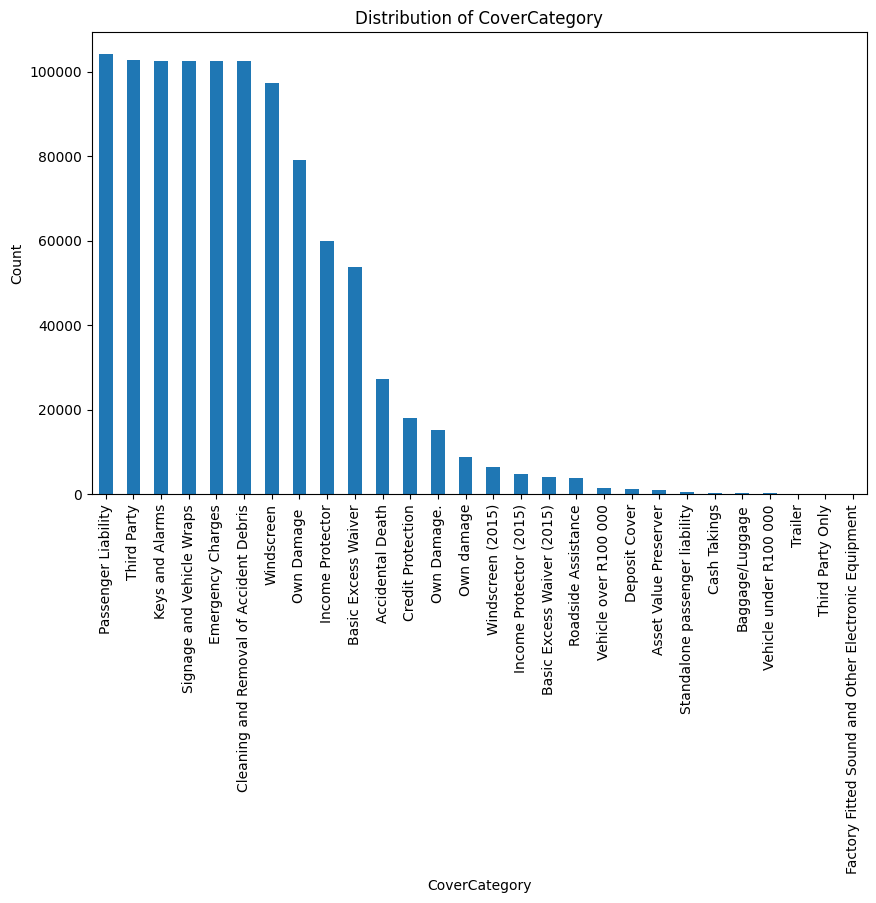

In [13]:
# Plot bar charts for categorical columns
categorical_columns = ['IsVATRegistered', 'Citizenship', 'LegalType', 'Gender']
fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(10, 12))

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='barh', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

df['CoverCategory'].value_counts().plot(kind='bar',figsize=(10, 6))
plt.title("Distribution of CoverCategory")
plt.ylabel("Count")
plt.show()

### Correlations and Associations

In [32]:
# df['PostalCode'].unique()
# unique_counts = df.groupby('PostalCode').apply(lambda x: x.count())
# print(unique_counts)

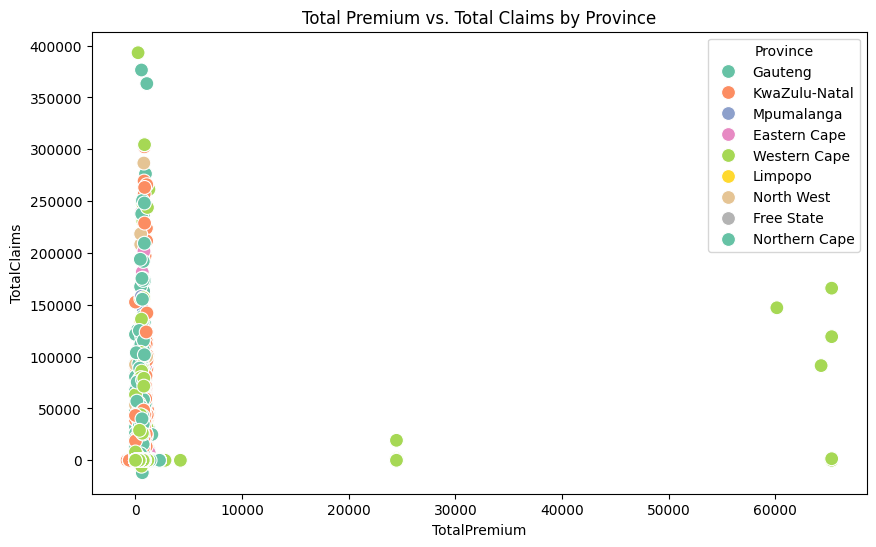

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=df, palette='Set2', s=100)
plt.title('Total Premium vs. Total Claims by Province')
plt.show()

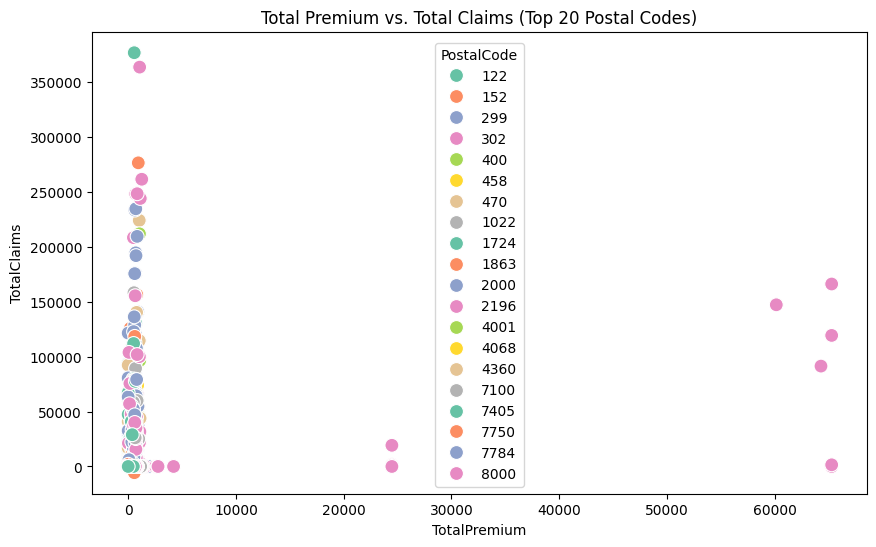

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 20 most frequent postal codes
top_postal_codes = df['PostalCode'].value_counts().index[:20]

# Filter the data to include only the top postal codes
filtered_df = df[df['PostalCode'].isin(top_postal_codes)]

# Scatter plot with limited PostalCodes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=filtered_df, palette='Set2', s=100)
plt.title('Total Premium vs. Total Claims (Top 20 Postal Codes)')
plt.show()

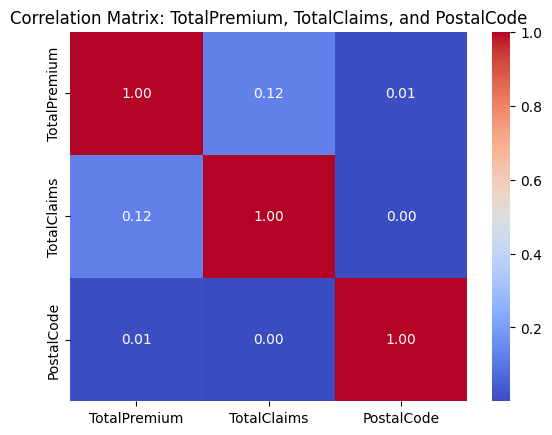

In [14]:
# Correlation matrix for TotalPremium, TotalClaims, and PostalCode
correlation_matrix = df[['TotalPremium', 'TotalClaims', 'PostalCode']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: TotalPremium, TotalClaims, and PostalCode')
plt.show()

### Trends Over Geography (Geographical Comparisons):

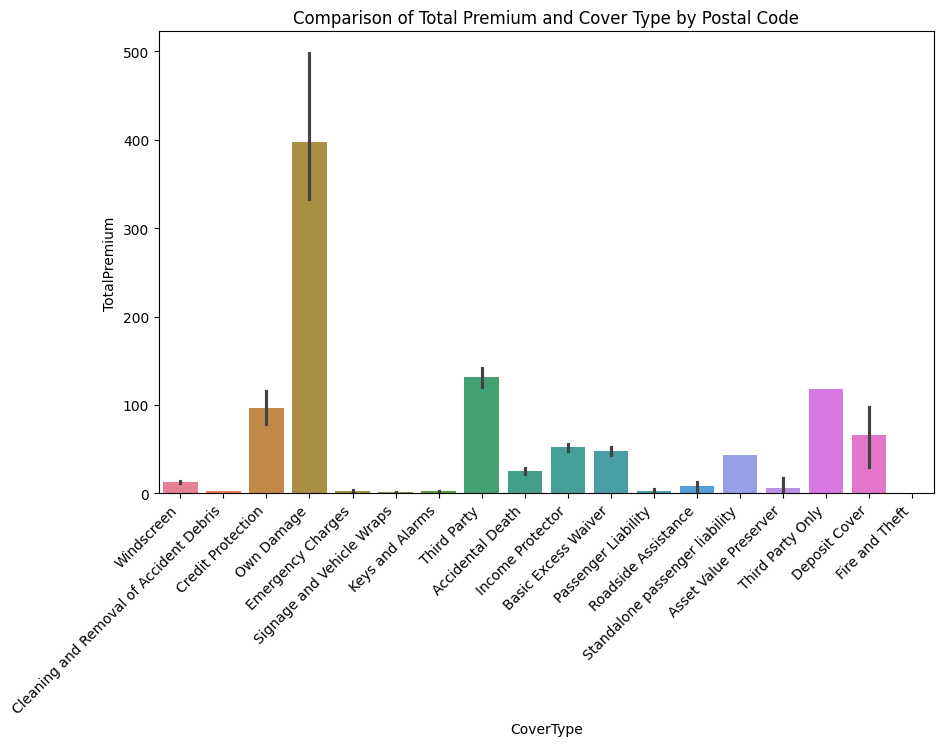

In [70]:
df_sampled = df.sample(5000) 
# Get the top 20 most frequent cover type
top_cover_type = df['CoverType'].value_counts().index[:10]
# Filter the data to include only the top cover type
filtered_Covertype_df = df[df['CoverType'].isin(top_cover_type)]
# Bar plot to compare Cover Type and Premium across Postal Codes
plt.figure(figsize=(10, 6))
sns.barplot(x='CoverType', y='TotalPremium', hue='CoverType', data=df_sampled)
plt.title('Comparison of Total Premium and Cover Type by Postal Code')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Outlier Detection (Using Box Plots)

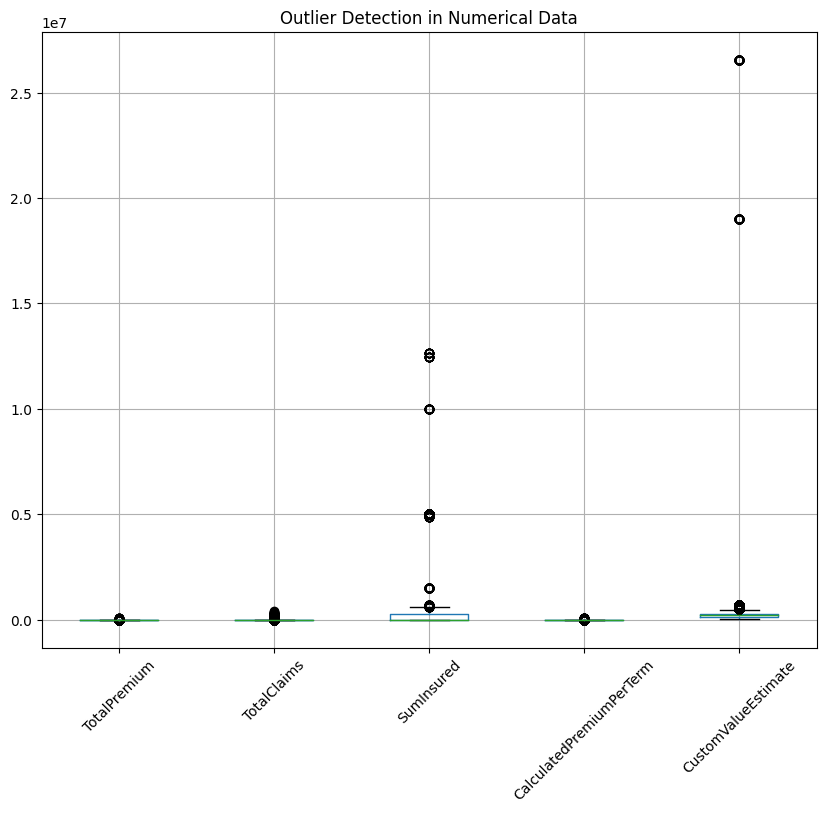

In [71]:
# Box plots for outlier detection in numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'CustomValueEstimate']
plt.figure(figsize=(10, 8))
df[numerical_columns].boxplot()
plt.title('Outlier Detection in Numerical Data')
plt.xticks(rotation=45)
plt.show()

### Heatmap for Correlations Across Variables:

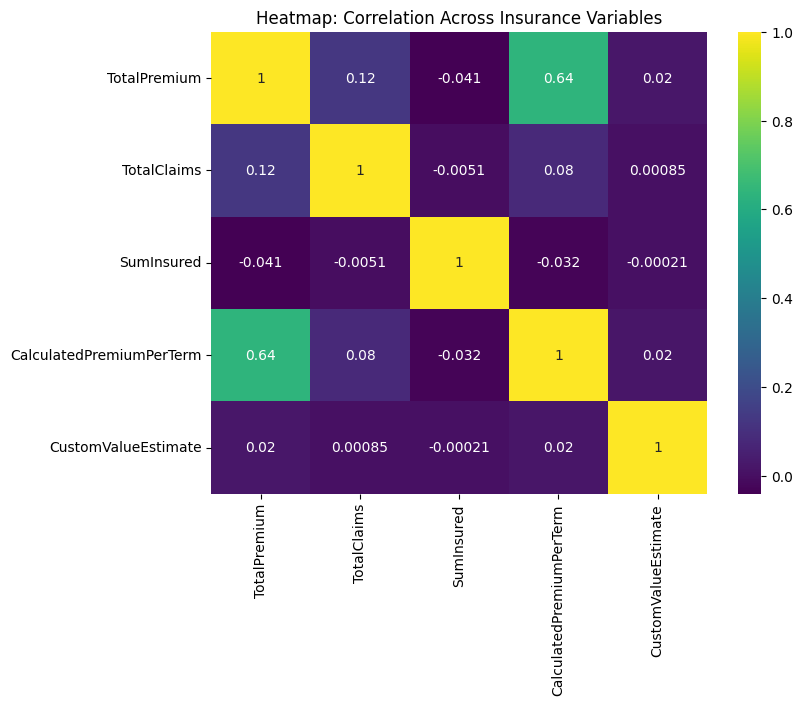

In [19]:
# Heatmap for correlation across all relevant numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'CustomValueEstimate']].corr(), annot=True, cmap='viridis')
plt.title('Heatmap: Correlation Across Insurance Variables')
plt.show()

### Trend Lines Across Vehicle Make and Premium:

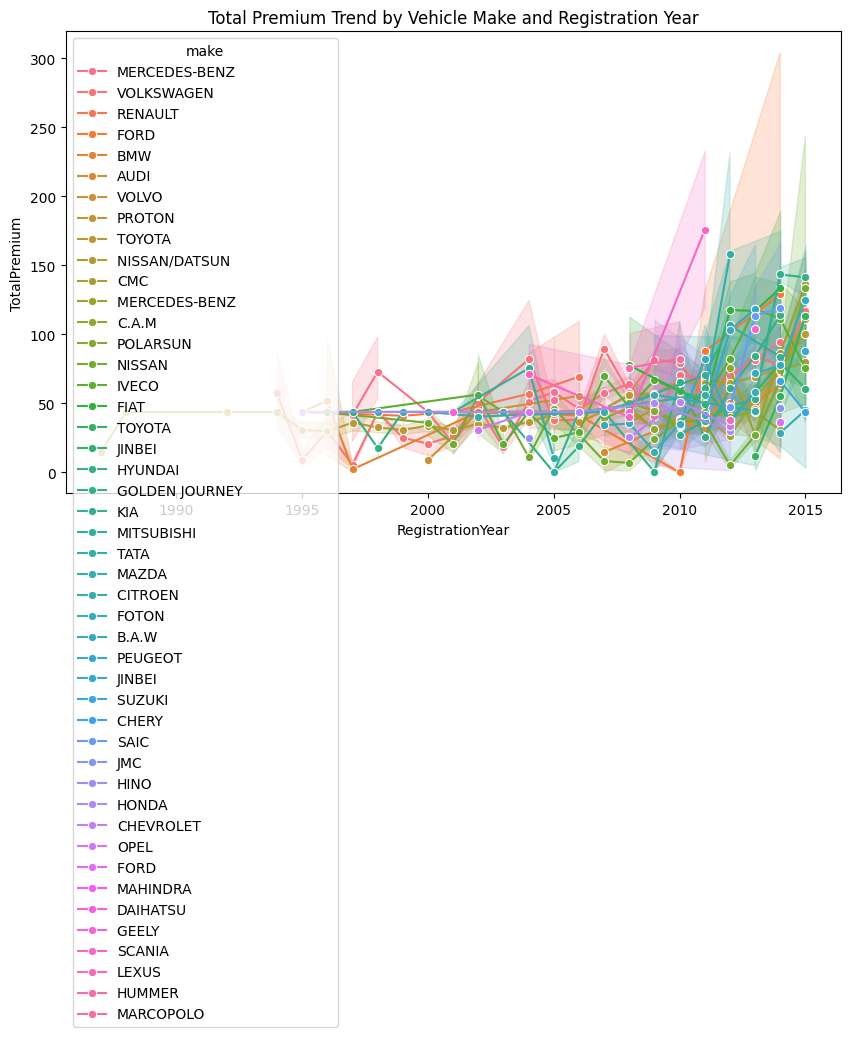

In [48]:
#Line plot for TotalPremium by Make and Registration Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='RegistrationYear', y='TotalPremium', hue='make', data=df, marker='o')
plt.title('Total Premium Trend by Vehicle Make and Registration Year')
plt.show()

### Box Plot by Auto Make for Premium Comparison:

In [ ]:
# Box plot to compare TotalPremium across different vehicle makes
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='TotalPremium', data=df)
plt.title('Box Plot: Premium Comparison Across Vehicle Makes')
plt.show()

T-statistic: -0.24803623812388725
P-value: 0.8041073961270343


In [17]:
# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")


Fail to reject the null hypothesis: No significant difference between the groups.
